# Neil Opitz DSC 540 Weeks 11 -12 Final Project Milestone 5

In [4]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

### Retro Sheet Data - CSV data

In [5]:
# create list of column headers based on website column information
column_headers = ["Date", "NumOfGame","DayOfWeek", "AwayTeam", "AwayTeamLeague", "AwayGameNum", "HomeTeam", "HomeTeamLeague", "HomeTeamGameNum", "AwayTeamScore", "HomeTeamScore", "TotalGameOuts", "DayNightIndicator", "CompletionInfo", "ForfeitInfo", "ProtestInfo", "ParkID", "Attendance", "GameLength", "AwayLineScore", "HomeLineScore", "AwayAB", "AwayHits", "AwayDoubles", "AwayTriples", "AwayHR", "AwayRBI", "AwaySacHits", "AwaySacFly", "AwayHBP", "AwayBB", "AwayIBB", "AwayK", "AwaySB", "AwayCS", "AwayGIDP", "AwayCatchInt", "AwayLOB", "AwayNumPitchers", "AwayIndivER", "AwayTeamER", "AwayWP", "AwayBalk", "AwayPutOuts", "AwayAssist", "AwayE", "AwayPB", "AwayDoubPlays", "AwayTripPlays", "HomeAB", "HomeHits", "HomeDoubles", "HomeTriples", "HomeHR", "HomeRBI", "HomeSacHits", "HomeSacFly", "HomeHBP", "HomeBB", "HomeIBB", "HomeK", "HomeSB", "HomeCS", "HomeGIDP", "HomeCatchInt", "HomeLOB", "HomeNumPitchers", "HomeIndivER", "HomeTeamER", "HomeWP", "HomeBalk", "HomePutOuts", "HomeAssist", "HomeE", "HomePB", "HomeDoubPlays", "HomeTripPlays", "UmpireHomeID", "UmpireHomeName", "Umpire1BID", "Umpire1BName", "Umpire2BID", "Umpire2BName", "Umpire3BID", "Umpire3BName", "UmpireLFID", "UmpireLFName", "UmpireRFID", "UmpireRFName", "AwayTeamManagerID", "AwayTeamManagerName", "HomeTeamManagerID", "HomeTeamManagerName", "WPID", "WPName", "LPID", "LPName", "SPID", "SPName", "GameWinRBIBatID", "GameWinRBIBatName", "AwaySPID", "AwaySPName", "HomeSPID", "HomeSPName", "AwayLineup1ID", "AwayLineup1Name", "AwayLineup1Pos", "AwayLineup2ID", "AwayLineup2Name", "AwayLineup2Pos", "AwayLineup3ID", "AwayLineup3Name", "AwayLineup3Pos", "AwayLineup4ID", "AwayLineup4Name", "AwayLineup4Pos", "AwayLineup5ID", "AwayLineup5Name", "AwayLineup5Pos", "AwayLineup6ID", "AwayLineup6Name", "AwayLineup6Pos", "AwayLineup7ID", "AwayLineup7Name", "AwayLineup7Pos", "AwayLineup8ID", "AwayLineup8Name", "AwayLineup8Pos", "AwayLineup9ID", "AwayLineup9Name", "AwayLineup9Pos", "HomeLineup1ID", "HomeLineup1Name", "HomeLineup1Pos", "HomeLineup2ID", "HomeLineup2Name", "HomeLineup2Pos", "HomeLineup3ID", "HomeLineup3Name", "HomeLineup3Pos", "HomeLineup4ID", "HomeLineup4Name", "HomeLineup4Pos", "HomeLineup5ID", "HomeLineup5Name", "HomeLineup5Pos", "HomeLineup6ID", "HomeLineup6Name", "HomeLineup6Pos","HomeLineup7ID", "HomeLineup7Name", "HomeLineup7Pos", "HomeLineup8ID", "HomeLineup8Name","HomeLineup8Pos","HomeLineup9ID", "HomeLineup9Name", "HomeLineup9Pos", "AddtlInfo","AcquisitionInfo"]

In [6]:
# read data into dataframe using column headers
retro = pd.read_csv("GL2018.txt", sep=",",names=["Date", "NumOfGame","DayOfWeek", "AwayTeam", "AwayTeamLeague", "AwayGameNum", "HomeTeam", "HomeTeamLeague", "HomeTeamGameNum", "AwayTeamScore", "HomeTeamScore", "TotalGameOuts", "DayNightIndicator", "CompletionInfo", "ForfeitInfo", "ProtestInfo", "ParkID", "Attendance", "GameLength", "AwayLineScore", "HomeLineScore", "AwayAB", "AwayHits", "AwayDoubles", "AwayTriples", "AwayHR", "AwayRBI", "AwaySacHits", "AwaySacFly", "AwayHBP", "AwayBB", "AwayIBB", "AwayK", "AwaySB", "AwayCS", "AwayGIDP", "AwayCatchInt", "AwayLOB", "AwayNumPitchers", "AwayIndivER", "AwayTeamER", "AwayWP", "AwayBalk", "AwayPutOuts", "AwayAssist", "AwayE", "AwayPB", "AwayDoubPlays", "AwayTripPlays", "HomeAB", "HomeHits", "HomeDoubles", "HomeTriples", "HomeHR", "HomeRBI", "HomeSacHits", "HomeSacFly", "HomeHBP", "HomeBB", "HomeIBB", "HomeK", "HomeSB", "HomeCS", "HomeGIDP", "HomeCatchInt", "HomeLOB", "HomeNumPitchers", "HomeIndivER", "HomeTeamER", "HomeWP", "HomeBalk", "HomePutOuts", "HomeAssist", "HomeE", "HomePB", "HomeDoubPlays", "HomeTripPlays", "UmpireHomeID", "UmpireHomeName", "Umpire1BID", "Umpire1BName", "Umpire2BID", "Umpire2BName", "Umpire3BID", "Umpire3BName", "UmpireLFID", "UmpireLFName", "UmpireRFID", "UmpireRFName", "AwayTeamManagerID", "AwayTeamManagerName", "HomeTeamManagerID", "HomeTeamManagerName", "WPID", "WPName", "LPID", "LPName", "SPID", "SPName", "GameWinRBIBatID", "GameWinRBIBatName", "AwaySPID", "AwaySPName", "HomeSPID", "HomeSPName", "AwayLineup1ID", "AwayLineup1Name", "AwayLineup1Pos", "AwayLineup2ID", "AwayLineup2Name", "AwayLineup2Pos", "AwayLineup3ID", "AwayLineup3Name", "AwayLineup3Pos", "AwayLineup4ID", "AwayLineup4Name", "AwayLineup4Pos", "AwayLineup5ID", "AwayLineup5Name", "AwayLineup5Pos", "AwayLineup6ID", "AwayLineup6Name", "AwayLineup6Pos", "AwayLineup7ID", "AwayLineup7Name", "AwayLineup7Pos", "AwayLineup8ID", "AwayLineup8Name", "AwayLineup8Pos", "AwayLineup9ID", "AwayLineup9Name", "AwayLineup9Pos", "HomeLineup1ID", "HomeLineup1Name", "HomeLineup1Pos", "HomeLineup2ID", "HomeLineup2Name", "HomeLineup2Pos", "HomeLineup3ID", "HomeLineup3Name", "HomeLineup3Pos", "HomeLineup4ID", "HomeLineup4Name", "HomeLineup4Pos", "HomeLineup5ID", "HomeLineup5Name", "HomeLineup5Pos", "HomeLineup6ID", "HomeLineup6Name", "HomeLineup6Pos","HomeLineup7ID", "HomeLineup7Name", "HomeLineup7Pos", "HomeLineup8ID", "HomeLineup8Name","HomeLineup8Pos","HomeLineup9ID", "HomeLineup9Name", "HomeLineup9Pos", "AddtlInfo","AcquisitionInfo"])

In [7]:
# calculate batting average for home and away teams per game
retro = retro.assign(AwayBatAve = retro.AwayHits / retro.AwayAB, HomeBatAve = retro.HomeHits / retro.HomeAB)

In [8]:
retro.head()

,Date,NumOfGame,DayOfWeek,AwayTeam,AwayTeamLeague,AwayGameNum,HomeTeam,HomeTeamLeague,HomeTeamGameNum,AwayTeamScore,...,HomeLineup8ID,HomeLineup8Name,HomeLineup8Pos,HomeLineup9ID,HomeLineup9Name,HomeLineup9Pos,AddtlInfo,AcquisitionInfo,AwayBatAve,HomeBatAve
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,...,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y,0.272727,0.333333
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,...,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y,0.193548,0.264706
2,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,...,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y,0.235294,0.193548
3,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,...,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y,0.257143,0.242424
4,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,...,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y,0.181818,0.363636


### ESPN Data - Web Scrape Data

In [9]:
# website to scrape data from:
url = 'http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/'

In [10]:
# as I need to scrape across several differet web pages, create a loop to scrape each page
# number to count webpages
pagenum = 1

# while loop to capture all webpages
while pagenum <=301:
    
    # convert page number into string and append to end of url
    pagenumstr = str(pagenum)
    finalurl = url+pagenumstr
    # print url to see which pages are being accessed
    print(finalurl)
        
    # request the website and pass the string to a beautiful soup method for parsing
    page = requests.get(finalurl)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    
    # find the header for the table with the needed data
    #soup.find_all('tr', attrs = {'class':'colhead'})   

    # find data for all players
    # re.compile is a regex that compiles the expression into an object which will be used multiple times
    players = soup.find_all('tr', attrs = {'class': re.compile('row player-10-')})

    # find the header that appears multiple times
    # using find instead of find_all gives us the first instance only    
    header = soup.find('tr', attrs = {'class':'colhead'})
    
    # for each element in header, col.get_text captures text header for each column
    columns = [col.get_text() for col in header.find_all('td')]
    
    # create dataframe from column data
    final_df = pd.DataFrame(columns = columns)


    # for loop to capture row stats for each player on webpage and transpose into column data
    for player in players:

        # store the stat data for each player in stats
        stats = [stat.get_text() for stat in player.find_all('td')]
        # create temporary dataframe for single player stats
        temp_df = pd.DataFrame(stats).transpose()
        temp_df.columns = columns

        # concatenate single player stats onto aggregate stat dataframe
        final_df = pd.concat([final_df, temp_df], ignore_index = True)        
        
    # create individual dataframes and append into final dataframe
    if pagenum == 1:
        df1 = final_df
    elif pagenum == 51:
        df51 = final_df
        df1_100 = df1.append(df51)
    elif pagenum == 101:
        df101 = final_df
        df1_150 = df1_100.append(df101)
    elif pagenum == 151:
        df151 = final_df
        df1_200 = df1_150.append(df151)
    elif pagenum == 201:
        df201 = final_df
        df1_250 = df1_200.append(df201)
    elif pagenum == 251:
        df251 = final_df
        df1_300 = df1_250.append(df251)
    elif pagenum == 301:
        df301 = final_df  
        final_stats_df = df1_300.append(df301)
    
    
    pagenum+=50

http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/1
http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/51
http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/101
http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/151
http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/201
http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/251
http://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2018/start/301


In [11]:
final_stats_df

,,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
0,1,Mookie Betts,6,136,520,129,180,47,5,32,80,81,91,30,6,.346
1,2,J.D. Martinez,9,150,569,111,188,37,2,43,130,69,146,6,1,.330
2,3,Jeff McNeil,2,63,225,35,74,11,6,3,19,14,24,7,1,.329
3,4,Christian Yelich,7,147,574,118,187,34,7,36,110,68,135,22,4,.326
4,5,Jose Altuve,9,137,534,84,169,29,2,13,61,55,79,17,4,.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,,Gary Sanchez,5,89,323,51,60,17,0,18,53,46,94,1,0,.186
27,328,Aaron Altherr,6,105,243,28,44,11,1,8,38,36,91,3,2,.181
28,329,Dexter Fowler,12,90,289,40,52,10,0,8,31,38,75,5,2,.180
29,330,Sandy Leon,8,89,265,30,47,12,0,5,22,15,75,1,0,.177


In [12]:
# drop the extra index column
final_stats_df.reset_index(drop=True, inplace=True)

In [13]:
web_data_df = pd.DataFrame(final_stats_df, columns =  ['PLAYER', 'YRS','G' ,'AB','R','H','2B','3B','HR','RBI','BB','SO','SB','CS','BA'])

In [14]:
web_data_df

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
0,Mookie Betts,6,136,520,129,180,47,5,32,80,81,91,30,6,.346
1,J.D. Martinez,9,150,569,111,188,37,2,43,130,69,146,6,1,.330
2,Jeff McNeil,2,63,225,35,74,11,6,3,19,14,24,7,1,.329
3,Christian Yelich,7,147,574,118,187,34,7,36,110,68,135,22,4,.326
4,Jose Altuve,9,137,534,84,169,29,2,13,61,55,79,17,4,.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Gary Sanchez,5,89,323,51,60,17,0,18,53,46,94,1,0,.186
327,Aaron Altherr,6,105,243,28,44,11,1,8,38,36,91,3,2,.181
328,Dexter Fowler,12,90,289,40,52,10,0,8,31,38,75,5,2,.180
329,Sandy Leon,8,89,265,30,47,12,0,5,22,15,75,1,0,.177


### Load retro data into database table

In [15]:
# import sqlalchemy
from sqlalchemy import create_engine

In [16]:
# create engine to interact with a database (DSC540_Final)
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)

# connect engine to database
sqlite_connection = engine.connect()

2020-05-28 10:43:53,289 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-28 10:43:53,289 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:43:53,289 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-28 10:43:53,289 INFO sqlalchemy.engine.base.Engine ()


In [17]:
# create database table name
sqlite_table = "retro_data"

# write dataframe to database table
retro.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-05-28 10:43:56,862 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("retro_data")
2020-05-28 10:43:56,862 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:43:56,862 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("retro_data")
2020-05-28 10:43:56,862 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:43:56,862 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE retro_data (
	"index" BIGINT, 
	"Date" BIGINT, 
	"NumOfGame" BIGINT, 
	"DayOfWeek" TEXT, 
	"AwayTeam" TEXT, 
	"AwayTeamLeague" TEXT, 
	"AwayGameNum" BIGINT, 
	"HomeTeam" TEXT, 
	"HomeTeamLeague" TEXT, 
	"HomeTeamGameNum" BIGINT, 
	"AwayTeamScore" BIGINT, 
	"HomeTeamScore" BIGINT, 
	"TotalGameOuts" BIGINT, 
	"DayNightIndicator" TEXT, 
	"CompletionInfo" TEXT, 
	"ForfeitInfo" FLOAT, 
	"ProtestInfo" FLOAT, 
	"ParkID" TEXT, 
	"Attendance" BIGINT, 
	"GameLength" BIGINT, 
	"AwayLineScore" TEXT, 
	"HomeLineScore" TEXT, 
	"AwayAB" BIGINT, 
	"AwayHits" BIGINT, 
	"AwayDoubles" BIGINT, 
	"AwayTriples" BIGINT, 
	"Awa

2020-05-28 10:43:57,263 INFO sqlalchemy.engine.base.Engine COMMIT


In [18]:
# read all data from database table
engine.execute("SELECT * FROM retro_data").fetchall()

2020-05-28 10:44:00,960 INFO sqlalchemy.engine.base.Engine SELECT * FROM retro_data
2020-05-28 10:44:00,965 INFO sqlalchemy.engine.base.Engine ()


[(0, 20180329, 0, 'Thu', 'COL', 'NL', 1, 'ARI', 'NL', 1, 2, 8, 51, 'N', None, None, None, 'PHO01', 48703, 216, '100001000', '30000320x', 33, 9, 0, 0, 2, 2, 1, 0, 0, 2, 0, 12, 0, 0, 2, 0, 7, 5, 8, 8, 0, 0, 24, 8, 0, 0, 0, 0, 36, 12, 2, 1, 0, 8, 0, 0, 0, 6, 0, 11, 2, 0, 0, 0, 10, 6, 2, 2, 1, 0, 27, 10, 0, 0, 2, 0, 'cedeg901', 'Gary Cederstrom', 'coope901', 'Eric Cooper', 'blasc901', 'Cory Blaser', 'sches901', 'Stu Scheurwater', None, '(none)', None, '(none)', 'blacb001', 'Buddy Black', 'lovut001', 'Tony Lovullo', 'corbp001', 'Patrick Corbin', 'grayj003', 'Jon Gray', None, '(none)', 'lambj001', 'Jake Lamb', 'grayj003', 'Jon Gray', 'corbp001', 'Patrick Corbin', 'blacc001', 'Charlie Blackmon', 8, 'lemad001', 'DJ LeMahieu', 4, 'arenn001', 'Nolan Arenado', 5, 'stort001', 'Trevor Story', 6, 'gonzc001', 'Carlos Gonzalez', 9, 'desmi001', 'Ian Desmond', 3, 'parrg001', 'Gerardo Parra', 7, 'iannc001', 'Chris Iannetta', 2, 'grayj003', 'Jon Gray', 1, 'perad001', 'David Peralta', 7, 'polla001', 'A.J. 

In [19]:
# read only Dodgers home game from specific date
engine.execute("SELECT * FROM retro_data WHERE HomeTeam = 'LAN'AND Date == '20180329' ").fetchall()

2020-05-28 10:44:06,199 INFO sqlalchemy.engine.base.Engine SELECT * FROM retro_data WHERE HomeTeam = 'LAN'AND Date == '20180329' 
2020-05-28 10:44:06,201 INFO sqlalchemy.engine.base.Engine ()


[(2, 20180329, 0, 'Thu', 'SFN', 'NL', 1, 'LAN', 'NL', 1, 1, 0, 54, 'D', None, None, None, 'LOS03', 53595, 175, '000010000', '000000000', 34, 8, 2, 0, 1, 1, 0, 0, 0, 2, 0, 11, 0, 0, 1, 0, 8, 5, 0, 0, 1, 0, 27, 11, 0, 0, 2, 0, 31, 6, 0, 0, 0, 0, 0, 0, 0, 5, 0, 10, 2, 0, 2, 0, 9, 4, 1, 1, 0, 0, 27, 9, 0, 0, 1, 0, 'wegnm901', 'Mark Wegner', 'reynj901', 'Jim Reynolds', 'dimum901', 'Mike DiMuro', 'tumpj901', 'John Tumpane', None, '(none)', None, '(none)', 'bochb002', 'Bruce Bochy', 'robed001', 'Dave Roberts', 'blact002', 'Ty Blach', 'kersc001', 'Clayton Kershaw', 'strih001', 'Hunter Strickland', 'panij002', 'Joe Panik', 'blact002', 'Ty Blach', 'kersc001', 'Clayton Kershaw', 'jacka001', 'Austin Jackson', 8, 'panij002', 'Joe Panik', 4, 'mccua001', 'Andrew McCutchen', 9, 'poseb001', 'Buster Posey', 2, 'longe001', 'Evan Longoria', 5, 'pench001', 'Hunter Pence', 7, 'beltb001', 'Brandon Belt', 3, 'crawb001', 'Brandon Crawford', 6, 'blact002', 'Ty Blach', 1, 'taylc001', 'Chris Taylor', 8, 'seagc001

### Load web data into database table

In [20]:
# create database table name
sqlite_table = "web_data"

# write dataframe to database table
web_data_df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-05-28 10:44:10,791 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("web_data")
2020-05-28 10:44:10,791 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:44:10,791 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("web_data")
2020-05-28 10:44:10,803 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:44:10,805 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE web_data (
	"index" BIGINT, 
	"PLAYER" TEXT, 
	"YRS" TEXT, 
	"G" TEXT, 
	"AB" TEXT, 
	"R" TEXT, 
	"H" TEXT, 
	"2B" TEXT, 
	"3B" TEXT, 
	"HR" TEXT, 
	"RBI" TEXT, 
	"BB" TEXT, 
	"SO" TEXT, 
	"SB" TEXT, 
	"CS" TEXT, 
	"BA" TEXT
)


2020-05-28 10:44:10,805 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:44:10,810 INFO sqlalchemy.engine.base.Engine COMMIT
2020-05-28 10:44:10,810 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_web_data_index ON web_data ("index")
2020-05-28 10:44:10,810 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:44:10,810 INFO sqlalchemy.engine.base.Engine COMMIT
2020-05-28 10:44:1

In [21]:
# read all data from database table
engine.execute("SELECT * FROM web_data").fetchall()

2020-05-28 10:44:14,037 INFO sqlalchemy.engine.base.Engine SELECT * FROM web_data
2020-05-28 10:44:14,046 INFO sqlalchemy.engine.base.Engine ()


[(0, 'Mookie Betts', '6', '136', '520', '129', '180', '47', '5', '32', '80', '81', '91', '30', '6', '.346'),
 (1, 'J.D. Martinez', '9', '150', '569', '111', '188', '37', '2', '43', '130', '69', '146', '6', '1', '.330'),
 (2, 'Jeff McNeil', '2', '63', '225', '35', '74', '11', '6', '3', '19', '14', '24', '7', '1', '.329'),
 (3, 'Christian Yelich', '7', '147', '574', '118', '187', '34', '7', '36', '110', '68', '135', '22', '4', '.326'),
 (4, 'Jose Altuve', '9', '137', '534', '84', '169', '29', '2', '13', '61', '55', '79', '17', '4', '.316'),
 (5, 'Justin Turner', '11', '103', '365', '62', '114', '31', '1', '14', '52', '47', '54', '2', '1', '.312'),
 (6, 'Mike Trout', '9', '140', '471', '101', '147', '24', '4', '39', '79', '122', '124', '24', '2', '.312'),
 (7, 'Scooter Gennett', '7', '154', '584', '86', '181', '30', '3', '23', '92', '42', '125', '4', '2', '.310'),
 (8, 'Michael Brantley', '11', '143', '570', '89', '176', '36', '2', '17', '76', '48', '60', '12', '3', '.309'),
 (9, 'Freddie

In [22]:
# read single player data from database table
engine.execute("SELECT * FROM web_data WHERE PLAYER = 'Aaron Judge'").fetchall()

2020-05-28 10:44:17,089 INFO sqlalchemy.engine.base.Engine SELECT * FROM web_data WHERE PLAYER = 'Aaron Judge'
2020-05-28 10:44:17,089 INFO sqlalchemy.engine.base.Engine ()


[(64, 'Aaron Judge', '4', '112', '413', '77', '115', '22', '0', '27', '67', '76', '152', '6', '3', '.278')]

### Capture API Data

In [2]:
# import api module for mlb statistis
import statsapi

In [3]:
# capture home run leaders for 2018 season
hr_leaders = statsapi.league_leaders('homeRuns', season = 2018, playerPool = 'All', limit = 50)
hr_leaders = hr_leaders.split('\n')
hr_leaders

['Rank Name                 Team                    Value',
 ' 1   Khris Davis          Oakland Athletics        48  ',
 ' 2   J.D. Martinez        Boston Red Sox           43  ',
 ' 3   Joey Gallo           Texas Rangers            40  ',
 ' 4   Jose Ramirez         Cleveland Indians        39  ',
 ' 4   Mike Trout           Los Angeles Angels       39  ',
 ' 6   Nolan Arenado        Colorado Rockies         38  ',
 ' 6   Francisco Lindor     Cleveland Indians        38  ',
 ' 6   Giancarlo Stanton    New York Yankees         38  ',
 ' 9   Nelson Cruz          Seattle Mariners         37  ',
 ' 9   Manny Machado        Los Angeles Dodgers      37  ',
 ' 9   Trevor Story         Colorado Rockies         37  ',
 ' 12  Matt Carpenter       St. Louis Cardinals      36  ',
 ' 12  Christian Yelich     Milwaukee Brewers        36  ',
 ' 14  Jesus Aguilar        Milwaukee Brewers        35  ',
 ' 14  Max Muncy            Los Angeles Dodgers      35  ',
 ' 16  Javier Baez          Chicago Cubs

In [25]:
# convert api data to dataframe
api_df = pd.DataFrame(hr_leaders, columns = ['HR_Leaders'])

### Load API data into database table

In [27]:
# create database table name
sqlite_table = "api_data"

# write dataframe to database table
api_df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-05-28 10:47:10,772 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("api_data")
2020-05-28 10:47:10,772 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:47:10,772 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("api_data")
2020-05-28 10:47:10,772 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:47:10,772 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE api_data (
	"index" BIGINT, 
	"HR_Leaders" TEXT
)


2020-05-28 10:47:10,772 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:47:10,787 INFO sqlalchemy.engine.base.Engine COMMIT
2020-05-28 10:47:10,787 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_api_data_index ON api_data ("index")
2020-05-28 10:47:10,787 INFO sqlalchemy.engine.base.Engine ()
2020-05-28 10:47:10,787 INFO sqlalchemy.engine.base.Engine COMMIT
2020-05-28 10:47:10,787 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-05-28 10:47:10,787 INFO sqlalchemy.engine.base.Engine INSERT INTO api_data ("index", "HR_Leaders") VALUES (?, ?)
2

In [28]:
# read api data from database table
engine.execute("SELECT * FROM api_data").fetchall()

2020-05-28 10:48:12,426 INFO sqlalchemy.engine.base.Engine SELECT * FROM api_data
2020-05-28 10:48:12,428 INFO sqlalchemy.engine.base.Engine ()


[(0, 'Rank Name                 Team                    Value'),
 (1, ' 1   Khris Davis          Oakland Athletics        48  '),
 (2, ' 2   J.D. Martinez        Boston Red Sox           43  '),
 (3, ' 3   Joey Gallo           Texas Rangers            40  '),
 (4, ' 4   Jose Ramirez         Cleveland Indians        39  '),
 (5, ' 4   Mike Trout           Los Angeles Angels       39  '),
 (6, ' 6   Nolan Arenado        Colorado Rockies         38  '),
 (7, ' 6   Francisco Lindor     Cleveland Indians        38  '),
 (8, ' 6   Giancarlo Stanton    New York Yankees         38  '),
 (9, ' 9   Nelson Cruz          Seattle Mariners         37  '),
 (10, ' 9   Manny Machado        Los Angeles Dodgers      37  '),
 (11, ' 9   Trevor Story         Colorado Rockies         37  '),
 (12, ' 12  Matt Carpenter       St. Louis Cardinals      36  '),
 (13, ' 12  Christian Yelich     Milwaukee Brewers        36  '),
 (14, ' 14  Jesus Aguilar        Milwaukee Brewers        35  '),
 (15, ' 14  Max Munc

## Create 5 Visualization That Demonstrate the Data

### Visualization 1: Season Attendance by Home Team

In [20]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum attendance by home team across all games
attend = sqlite_connection.execute("SELECT SUM(Attendance), HomeTeam FROM retro_data GROUP BY HomeTeam ORDER BY SUM(ATTENDANCE) DESC")

# store query results in a dataframe
attend_df = pd.DataFrame(attend)
attend_df.columns =attend.keys()
attend_df

2020-05-27 11:19:33,000 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 11:19:33,001 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 11:19:33,002 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 11:19:33,002 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 11:19:33,003 INFO sqlalchemy.engine.base.Engine SELECT SUM(Attendance), HomeTeam FROM retro_data GROUP BY HomeTeam ORDER BY SUM(ATTENDANCE) DESC
2020-05-27 11:19:33,004 INFO sqlalchemy.engine.base.Engine ()


,SUM(Attendance),HomeTeam
0,3857500,LAN
1,3482855,NYA
2,3403587,SLN
3,3181089,CHN
4,3156185,SFN
5,3020216,ANA
6,3015880,COL
7,2980549,HOU
8,2895575,BOS
9,2850875,MIL


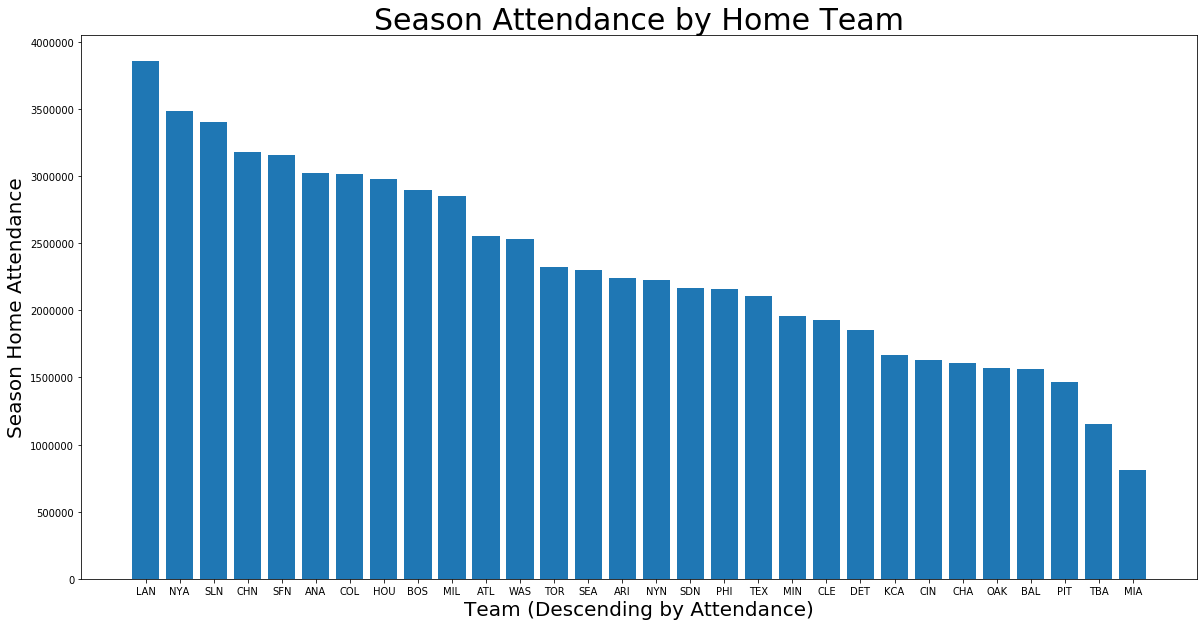

In [23]:
# create bar chart from query results
plt.figure(figsize = (20,10))
plt.bar(attend_df['HomeTeam'], attend_df['SUM(Attendance)'])
plt.xlabel("Team (Descending by Attendance)", fontsize = 20)
plt.ylabel("Season Home Attendance", fontsize = 20)
plt.title("Season Attendance by Home Team", fontsize = 30)
plt.show()

#### The Los Angeles Dodgers (LAN) had the highest home attendance (3.9 Million) across all 30 Major League Baseball teams.  The Miami Marlins (MIA) had the lowest home attendance (<1 Million).

### Visualization 2: Scatterplot of Home Runs and Strike Outs

In [24]:
# convert string data to numeric
web_data_df['HR'] = pd.to_numeric(web_data_df['HR'])
web_data_df['AB'] = pd.to_numeric(web_data_df['AB'])
web_data_df['SO'] = pd.to_numeric(web_data_df['SO'])

# calculate new variables from existing variables
web_data_df['HR_PER_AB'] = web_data_df['HR'] / web_data_df['AB']
web_data_df['SO_PER_AB'] = web_data_df['SO'] / web_data_df['AB']

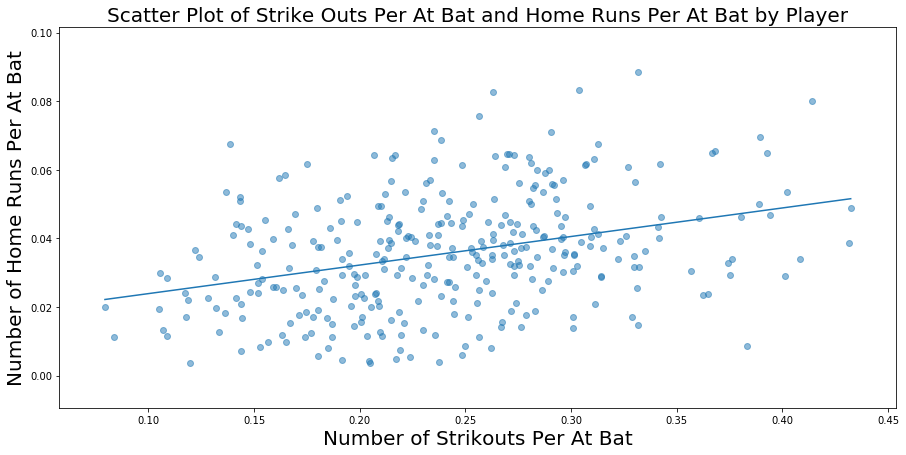

In [27]:
# define x and y data
x = web_data_df['SO_PER_AB']
y = web_data_df['HR_PER_AB']

# create scatter plot of data
plt.figure(figsize = (15,7))
plt.scatter(x, y, alpha=0.5)

# add line of best fit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.xlabel("Number of Strikouts Per At Bat", fontsize = 20)
plt.ylabel("Number of Home Runs Per At Bat", fontsize = 20)
plt.title("Scatter Plot of Strike Outs Per At Bat and Home Runs Per At Bat by Player", fontsize = 20)
plt.show()

#### There is a strong positive relationship between the number of times a player strikes out and the number of home runs hit in a season.

### Visualization 3: Histogram of Away Team and Home Team Individual Game Batting Averages

In [28]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum at bats and hits for home and away teams across all games
batave = sqlite_connection.execute("SELECT SUM(AwayAB),SUM(AwayHits), SUM(HomeAB),SUM(HomeHits) FROM retro_data ")

# store query results in a dataframe
batave_df = pd.DataFrame(batave)
batave_df.columns =batave.keys()
batave_df

2020-05-27 11:20:50,309 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 11:20:50,309 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 11:20:50,309 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 11:20:50,309 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 11:20:50,309 INFO sqlalchemy.engine.base.Engine SELECT SUM(AwayAB),SUM(AwayHits), SUM(HomeAB),SUM(HomeHits) FROM retro_data 
2020-05-27 11:20:50,309 INFO sqlalchemy.engine.base.Engine ()


,SUM(AwayAB),SUM(AwayHits),SUM(HomeAB),SUM(HomeHits)
0,84673,20753,80759,20265


In [29]:
# calculate home and away team batting averages
batave_df['AwayBatAve'] = batave_df['SUM(AwayHits)']  /batave_df['SUM(AwayAB)'] 
batave_df['HomeBatAve'] = batave_df['SUM(HomeHits)']  /batave_df['SUM(HomeAB)'] 

# round batting average to 3 decimals using lambda function
batave_df['AwayBatAve']=batave_df['AwayBatAve'].apply(lambda x:round(x,3))
batave_df['HomeBatAve']=batave_df['HomeBatAve'].apply(lambda x:round(x,3))

batave_df

,SUM(AwayAB),SUM(AwayHits),SUM(HomeAB),SUM(HomeHits),AwayBatAve,HomeBatAve
0,84673,20753,80759,20265,0.245,0.251


#### The home team generates a higher batting average than the away team across all Major League Baseball games.

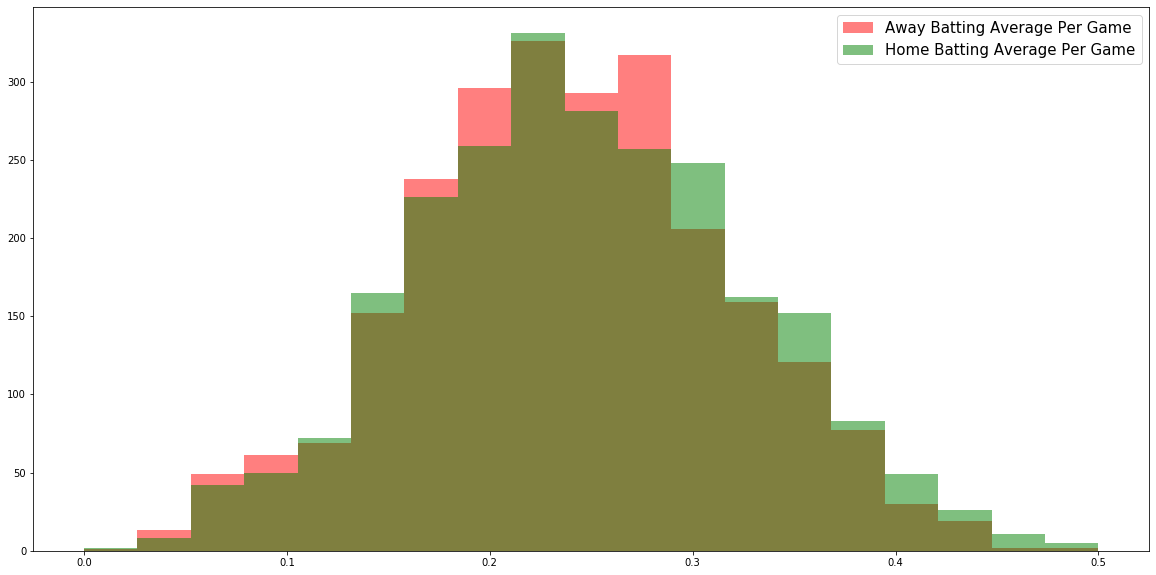

In [30]:
# create histogram of batting individual game batting averages for away and home teams

# define x and y values
x = retro['AwayBatAve']
y = retro['HomeBatAve']

# define x values parameters and number of bins
bins = np.linspace(0, 0.5, 20)

plt.figure(figsize = (20,10))
plt.hist(x, bins, alpha=0.5, color = 'red', label='Away Batting Average Per Game')
plt.hist(y, bins, alpha=0.5, color = 'green', label='Home Batting Average Per Game')
plt.legend(loc='upper right', fontsize = 15)
plt.show()

#### The home team has a higher overall batting average (.251 compared to .245) and has a higher proportion of games with higher batting averages compared to away teams.

### Visualization 4: Percent of Games Started Among Top 3 MLB Players (Based on Batting Average)

In [49]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum games by top player MLB
mookie = sqlite_connection.execute("SELECT count(*),AwayLineup1Name FROM retro_data WHERE (HomeLineup1Name = 'Mookie Betts' OR HomeLineup2Name = 'Mookie Betts' OR HomeLineup3Name = 'Mookie Betts' OR HomeLineup4Name = 'Mookie Betts' OR HomeLineup5Name = 'Mookie Betts' OR HomeLineup6Name = 'Mookie Betts' OR HomeLineup7Name = 'Mookie Betts' OR HomeLineup8Name = 'Mookie Betts' OR HomeLineup9Name = 'Mookie Betts' OR AwayLineup1Name = 'Mookie Betts' OR AwayLineup2Name = 'Mookie Betts' OR AwayLineup3Name = 'Mookie Betts' OR AwayLineup4Name = 'Mookie Betts' OR AwayLineup5Name = 'Mookie Betts' OR AwayLineup6Name = 'Mookie Betts' OR AwayLineup7Name = 'Mookie Betts' OR AwayLineup8Name = 'Mookie Betts' OR AwayLineup9Name = 'Mookie Betts')" )

# store query results in a dataframe
mookie_df = pd.DataFrame(mookie)
mookie_df.columns =mookie.keys()
mookie_df

2020-05-27 12:16:26,669 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 12:16:26,669 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:16:26,671 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 12:16:26,671 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:16:26,672 INFO sqlalchemy.engine.base.Engine SELECT count(*),AwayLineup1Name FROM retro_data WHERE (HomeLineup1Name = 'Mookie Betts' OR HomeLineup2Name = 'Mookie Betts' OR HomeLineup3Name = 'Mookie Betts' OR HomeLineup4Name = 'Mookie Betts' OR HomeLineup5Name = 'Mookie Betts' OR HomeLineup6Name = 'Mookie Betts' OR HomeLineup7Name = 'Mookie Betts' OR HomeLineup8Name = 'Mookie Betts' OR HomeLineup9Name = 'Mookie Betts' OR AwayLineup1Name = 'Mookie Betts' OR AwayLineup2Name = 'Mookie Betts' OR AwayLineup3Name = 'Mookie Betts' OR AwayLineup4Name = 'Mookie Betts' OR AwayLineup5Name = 'Mookie Betts' OR AwayLineup6Name = 'M

,count(*),AwayLineup1Name
0,131,Mookie Betts


In [54]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum games by number 2 player MLB
jd = sqlite_connection.execute("SELECT count(*),AwayLineup4Name FROM retro_data WHERE (HomeLineup1Name = 'J.D. Martinez' OR HomeLineup2Name = 'J.D. Martinez' OR HomeLineup3Name = 'J.D. Martinez' OR HomeLineup4Name = 'J.D. Martinez' OR HomeLineup5Name = 'J.D. Martinez' OR HomeLineup6Name = 'J.D. Martinez' OR HomeLineup7Name = 'J.D. Martinez' OR HomeLineup8Name = 'J.D. Martinez' OR HomeLineup9Name = 'J.D. Martinez' OR AwayLineup1Name = 'J.D. Martinez' OR AwayLineup2Name = 'J.D. Martinez' OR AwayLineup3Name = 'J.D. Martinez' OR AwayLineup4Name = 'J.D. Martinez' OR AwayLineup5Name = 'J.D. Martinez' OR AwayLineup6Name = 'J.D. Martinez' OR AwayLineup7Name = 'J.D. Martinez' OR AwayLineup8Name = 'J.D. Martinez' OR AwayLineup9Name = 'J.D. Martinez')" )

# store query results in a dataframe
jd_df = pd.DataFrame(jd)
jd_df.columns =jd.keys()
jd_df


2020-05-27 12:20:54,121 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 12:20:54,122 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:20:54,123 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 12:20:54,123 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:20:54,124 INFO sqlalchemy.engine.base.Engine SELECT count(*),AwayLineup4Name FROM retro_data WHERE (HomeLineup1Name = 'J.D. Martinez' OR HomeLineup2Name = 'J.D. Martinez' OR HomeLineup3Name = 'J.D. Martinez' OR HomeLineup4Name = 'J.D. Martinez' OR HomeLineup5Name = 'J.D. Martinez' OR HomeLineup6Name = 'J.D. Martinez' OR HomeLineup7Name = 'J.D. Martinez' OR HomeLineup8Name = 'J.D. Martinez' OR HomeLineup9Name = 'J.D. Martinez' OR AwayLineup1Name = 'J.D. Martinez' OR AwayLineup2Name = 'J.D. Martinez' OR AwayLineup3Name = 'J.D. Martinez' OR AwayLineup4Name = 'J.D. Martinez' OR AwayLineup5Name = 'J.D. Martinez' OR AwayLi

,count(*),AwayLineup4Name
0,150,J.D. Martinez


In [62]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum games by number 3 player MLB
jeff = sqlite_connection.execute("SELECT count(*),AwayLineup7Name FROM retro_data WHERE (HomeLineup1Name = 'Jeff McNeil' OR HomeLineup2Name = 'Jeff McNeil' OR HomeLineup3Name = 'Jeff McNeil' OR HomeLineup4Name = 'Jeff McNeil' OR HomeLineup5Name = 'Jeff McNeil' OR HomeLineup6Name = 'Jeff McNeil' OR HomeLineup7Name = 'Jeff McNeil' OR HomeLineup8Name = 'Jeff McNeil' OR HomeLineup9Name = 'Jeff McNeil' OR AwayLineup1Name = 'Jeff McNeil' OR AwayLineup2Name = 'Jeff McNeil' OR AwayLineup3Name = 'Jeff McNeil' OR AwayLineup4Name = 'Jeff McNeil' OR AwayLineup5Name = 'Jeff McNeil' OR AwayLineup6Name = 'Jeff McNeil' OR AwayLineup7Name = 'Jeff McNeil' OR AwayLineup8Name = 'Jeff McNeil' OR AwayLineup9Name = 'Jeff McNeil')")

# store query results in a dataframe
jeff_df = pd.DataFrame(jeff)
jeff_df.columns =jeff.keys()
jeff_df


2020-05-27 12:24:38,838 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 12:24:38,839 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:24:38,839 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 12:24:38,840 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:24:38,841 INFO sqlalchemy.engine.base.Engine SELECT count(*),AwayLineup7Name FROM retro_data WHERE (HomeLineup1Name = 'Jeff McNeil' OR HomeLineup2Name = 'Jeff McNeil' OR HomeLineup3Name = 'Jeff McNeil' OR HomeLineup4Name = 'Jeff McNeil' OR HomeLineup5Name = 'Jeff McNeil' OR HomeLineup6Name = 'Jeff McNeil' OR HomeLineup7Name = 'Jeff McNeil' OR HomeLineup8Name = 'Jeff McNeil' OR HomeLineup9Name = 'Jeff McNeil' OR AwayLineup1Name = 'Jeff McNeil' OR AwayLineup2Name = 'Jeff McNeil' OR AwayLineup3Name = 'Jeff McNeil' OR AwayLineup4Name = 'Jeff McNeil' OR AwayLineup5Name = 'Jeff McNeil' OR AwayLineup6Name = 'Jeff McNeil' OR

,count(*),AwayLineup7Name
0,53,Jeff McNeil


In [97]:
# rename column names in 3 top player dataframes
mookie_df.columns = ['Games_Started', 'PLAYER']
jd_df.columns = ['Games_Started', 'PLAYER']
jeff_df.columns = ['Games_Started', 'PLAYER']

In [98]:
# append top 3 player dataframes into single dataframe
top3_df = mookie_df
top3_df = top3_df.append(jd_df)
top3_df = top3_df.append(jeff_df)

In [99]:
# drop the extra index column
top3_df.reset_index(drop=True, inplace=True)

In [100]:
top3_df

,Games_Started,PLAYER
0,131,Mookie Betts
1,150,J.D. Martinez
2,53,Jeff McNeil


In [102]:
# create database table name
sqlite_table = "top3_players"

# write dataframe to database table
top3_df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-05-27 12:41:56,740 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("top3_players")
2020-05-27 12:41:56,740 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:41:56,740 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("top3_players")
2020-05-27 12:41:56,745 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:41:56,746 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE top3_players (
	"index" BIGINT, 
	"Games_Started" BIGINT, 
	"PLAYER" TEXT
)


2020-05-27 12:41:56,747 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:41:56,752 INFO sqlalchemy.engine.base.Engine COMMIT
2020-05-27 12:41:56,752 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_top3_players_index ON top3_players ("index")
2020-05-27 12:41:56,752 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 12:41:56,768 INFO sqlalchemy.engine.base.Engine COMMIT
2020-05-27 12:41:56,768 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-05-27 12:41:56,768 INFO sqlalchemy.engine.base.Engine INSERT INTO top3_p

In [103]:
# read all data from database table
engine.execute("SELECT * FROM top3_players").fetchall()

2020-05-27 12:42:08,696 INFO sqlalchemy.engine.base.Engine SELECT * FROM top3_players
2020-05-27 12:42:08,697 INFO sqlalchemy.engine.base.Engine ()


[(0, 131, 'Mookie Betts'), (1, 150, 'J.D. Martinez'), (2, 53, 'Jeff McNeil')]

In [128]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query two tables using INNER JOIN to capture total games and games started for top 3 players
players = engine.execute("SELECT web_data.PLAYER, G, top3_players.Games_Started FROM web_data INNER JOIN top3_players ON web_data.PLAYER = top3_players.PLAYER")

# store query results in a dataframe
players_df = pd.DataFrame(players)
players_df.columns =players.keys()
players_df

2020-05-27 16:42:37,355 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 16:42:37,356 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 16:42:37,356 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 16:42:37,357 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 16:42:37,358 INFO sqlalchemy.engine.base.Engine SELECT web_data.PLAYER, G, top3_players.Games_Started FROM web_data INNER JOIN top3_players ON web_data.PLAYER = top3_players.PLAYER
2020-05-27 16:42:37,358 INFO sqlalchemy.engine.base.Engine ()


,PLAYER,G,Games_Started
0,Mookie Betts,136,131
1,J.D. Martinez,150,150
2,Jeff McNeil,63,53


In [134]:
# convert string data to numeric
players_df['G'] = pd.to_numeric(players_df['G'])
players_df['Games_Started'] = pd.to_numeric(players_df['Games_Started'])

# sum total games started and played
Total_Games_Played = players_df.G.sum()
Total_Games_Started = players_df.Games_Started.sum()

# Calculate % of total games started
Percent_Games_Started = Total_Games_Started / Total_Games_Played
Percent_Games_Not_Started = 1 - Percent_Games_Started 

Text(0.5, 1.0, 'Among Appearances: Percent of Games Started Among Top 3 MLB Players (Based on Batting Average)')

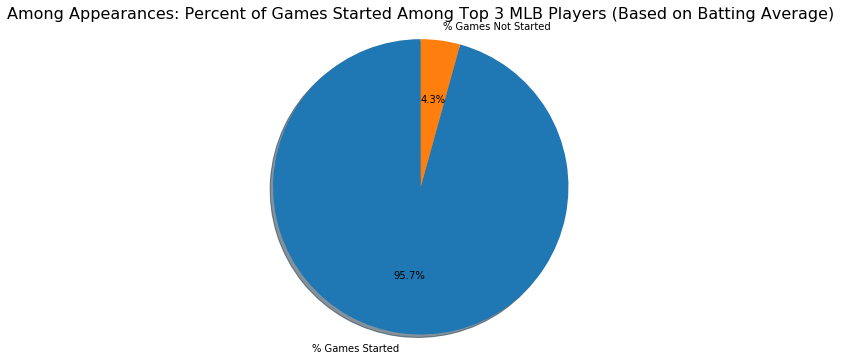

In [240]:
# create pie chart
labels = '% Games Started' , '% Games Not Started'
sizes = [Percent_Games_Started, Percent_Games_Not_Started]

fig1, ax1 = plt.subplots(figsize = (10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Among Appearances: Percent of Games Started Among Top 3 MLB Players (Based on Batting Average)", fontsize = 16)



#### The top 3 MLB players (based on batting average) started 95% of games in which they made an appearance in the 2018 season.

### Visualization 5: Proportion of Boston Red Sox At Bats and Hits Generated by Mookie Betts & J.D. Martinez.

In [161]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum total away game hits by Boston Red Sox for 2018
bos_away_hits = sqlite_connection.execute("SELECT SUM(AwayHits) FROM retro_data WHERE AwayTeam = 'BOS'" )

# store query results in a dataframe
bos_away_hits_df = pd.DataFrame(bos_away_hits)
bos_away_hits_df.columns =bos_hits.keys()
bos_away_hits_df

2020-05-27 17:45:25,815 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:45:25,815 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:45:25,816 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:45:25,816 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:45:25,817 INFO sqlalchemy.engine.base.Engine SELECT SUM(AwayHits) FROM retro_data WHERE AwayTeam = 'BOS'
2020-05-27 17:45:25,817 INFO sqlalchemy.engine.base.Engine ()


,SUM(AwayHits)
0,724


In [159]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum total home game hits by Boston Red Sox for 2018
bos_home_hits = sqlite_connection.execute("SELECT SUM(HomeHits) FROM retro_data WHERE HomeTeam = 'BOS'" )

# store query results in a dataframe
bos_home_hits_df = pd.DataFrame(bos_home_hits)
bos_home_hits_df.columns =bos_hits.keys()
bos_home_hits_df

2020-05-27 17:44:10,987 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:44:10,988 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:44:10,988 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:44:10,989 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:44:10,989 INFO sqlalchemy.engine.base.Engine SELECT SUM(HomeHits) FROM retro_data WHERE HomeTeam = 'BOS'
2020-05-27 17:44:10,990 INFO sqlalchemy.engine.base.Engine ()


,SUM(AwayHits)
0,785


In [178]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum total away game at bats by Boston Red Sox for 2018
bos_away_abs = sqlite_connection.execute("SELECT SUM(AwayAB) FROM retro_data WHERE AwayTeam = 'BOS'" )

# store query results in a dataframe
bos_away_abs_df = pd.DataFrame(bos_away_abs)
bos_away_abs_df.columns =bos_away_abs.keys()
bos_away_abs_df

2020-05-27 17:58:31,004 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:58:31,005 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:58:31,006 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:58:31,006 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:58:31,007 INFO sqlalchemy.engine.base.Engine SELECT SUM(AwayAB) FROM retro_data WHERE AwayTeam = 'BOS'
2020-05-27 17:58:31,007 INFO sqlalchemy.engine.base.Engine ()


,SUM(AwayAB)
0,2836


In [179]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum total home game at bats by Boston Red Sox for 2018
bos_home_abs = sqlite_connection.execute("SELECT SUM(HomeAB) FROM retro_data WHERE HomeTeam = 'BOS'" )

# store query results in a dataframe
bos_home_abs_df = pd.DataFrame(bos_home_abs)
bos_home_abs_df.columns =bos_home_abs.keys()
bos_home_abs_df

2020-05-27 17:59:32,378 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:59:32,378 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:59:32,379 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 17:59:32,379 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 17:59:32,380 INFO sqlalchemy.engine.base.Engine SELECT SUM(HomeAB) FROM retro_data WHERE HomeTeam = 'BOS'
2020-05-27 17:59:32,380 INFO sqlalchemy.engine.base.Engine ()


,SUM(HomeAB)
0,2787


In [201]:
# sum the total home and away hits for Boston Red Sox
Boston_Total_Away_ABs = bos_away_abs_df.iloc[0,0]
Boston_Total_Home_ABs = bos_home_abs_df.iloc[0,0]
Boston_Total_ABs = Boston_Total_Away_ABs + Boston_Total_Home_ABs

In [204]:
# sum the total home and away hits for Boston Red Sox
Boston_Total_Away_Hits = bos_away_hits_df.iloc[0,0]
Boston_Total_Home_Hits = bos_home_hits_df.iloc[0,0]
Boston_Total_Hits = Boston_Total_Away_Hits + Boston_Total_Home_Hits

In [170]:
# convert string data to numeric
web_data_df['H'] = pd.to_numeric(web_data_df['H'])
web_data_df['AB'] = pd.to_numeric(web_data_df['AB'])

In [174]:
# sum Mookie Betts and J.D. Martinez at bats and hits for season
Betts_Martinez_Hits = web_data_df.iloc[0,5]+ web_data_df.iloc[1,5]
Betts_Martinez_ABs = web_data_df.iloc[0,3]+ web_data_df.iloc[1,3]

In [211]:
# Calculate the proportion of Betts and Martinez AB and Hits among Boston Red Sox AB and Hits
Betts_Martinez_Percent_ABs = Betts_Martinez_ABs / Boston_Total_ABs
Betts_Martinez_Percent_Hits = Betts_Martinez_Hits / Boston_Total_Hits
Remainder_Percent_ABs = 1 - Betts_Martinez_Percent_ABs
Remainder_Percent_Hits = 1 - Betts_Martinez_Percent_Hits

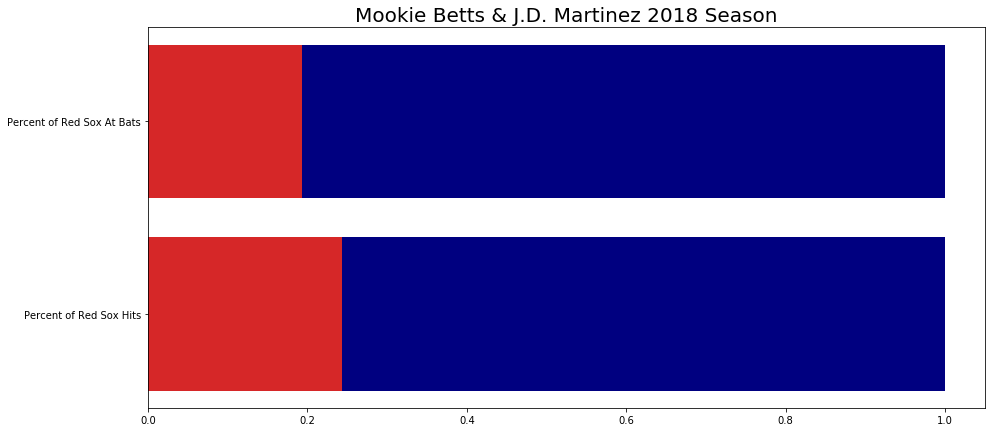

In [239]:
# create horizontal bar chart of Betts/Martinez AB and Hit Percentages among all Red Sox AB and Hits

labels = ['Percent of Red Sox Hits', 'Percent of Red Sox At Bats']  

BettsMartinez = [Betts_Martinez_Percent_Hits, Betts_Martinez_Percent_ABs]  
Remainder = [Remainder_Percent_Hits,Remainder_Percent_ABs]

plt.figure(figsize = (15,7))

plt.barh(labels, Remainder, color="tab:red")  
plt.barh(year, Remainder, left=BettsMartinez, color="navy")

plt.title('Mookie Betts & J.D. Martinez 2018 Season', fontsize = 20)  

plt.show()  

#### Betts and Martinez accounted for approximately 20% of at bats and a disproportionately higher 25% of hits for the 2018 Boston Red Sox.

### Visualization 6: Daily Batting Average Line Chart

In [344]:
# sqlalchemy connection and engine to communicate with database
engine = create_engine('sqlite:///DSC540_Final.db', echo=True)
sqlite_connection = engine.connect()

# query to sum attendance by home team across all games
daily_bat_ave = sqlite_connection.execute("SELECT (1000*(SUM(AwayHits) + SUM(HomeHits)) / (SUM(AwayAB) + SUM(HomeAB))) AS BatAve FROM retro_data GROUP BY Date")

# store query results in a dataframe
daily_bat_ave_df = pd.DataFrame(daily_bat_ave)
daily_bat_ave_df.columns =daily_bat_ave.keys()
daily_bat_ave_df

2020-05-27 22:27:00,017 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-27 22:27:00,017 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 22:27:00,017 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-27 22:27:00,017 INFO sqlalchemy.engine.base.Engine ()
2020-05-27 22:27:00,017 INFO sqlalchemy.engine.base.Engine SELECT (1000*(SUM(AwayHits) + SUM(HomeHits)) / (SUM(AwayAB) + SUM(HomeAB))) AS BatAve FROM retro_data GROUP BY Date
2020-05-27 22:27:00,017 INFO sqlalchemy.engine.base.Engine ()


,BatAve
0,233
1,218
2,252
3,237
4,239
...,...
179,224
180,262
181,246
182,227


In [345]:
daily_bat_ave_df['BatAve'] = daily_bat_ave_df['BatAve']/1000 

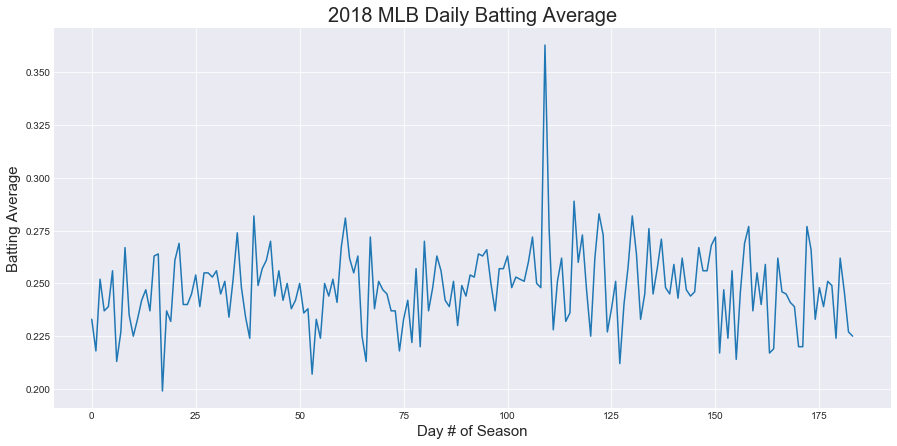

In [346]:
#Plot a line graph
plt.figure(figsize = (15,7))
plt.plot(daily_bat_ave_df['BatAve'])
plt.title("2018 MLB Daily Batting Average", fontsize = 20)
plt.xlabel("Day # of Season", fontsize = 15)
plt.ylabel("Batting Average", fontsize = 15)
plt.show()

#### There appears to be an outlier.

In [348]:
# outlier
daily_bat_ave_df['BatAve'].max()

0.363

In [336]:
# replace outlier with average
daily_bat_ave_df.loc[(daily_bat_ave_df['BatAve'] == 0.363),'BatAve']=daily_bat_ave_df['BatAve'].mean()

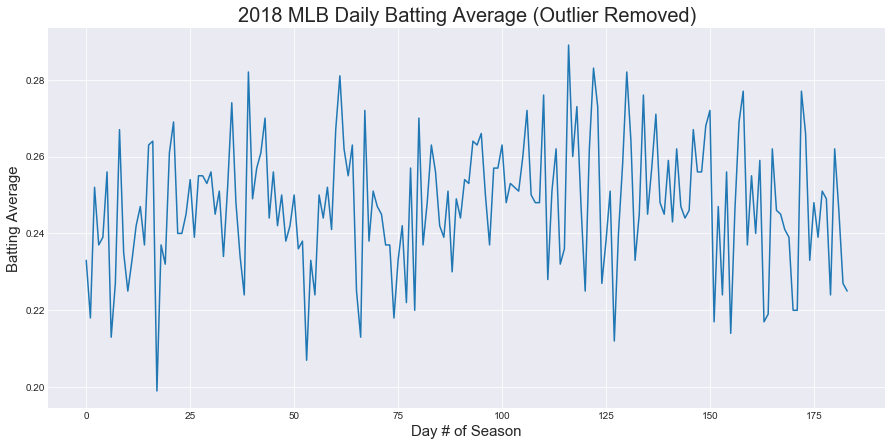

In [342]:
#Plot a line graph
plt.figure(figsize = (15,7))
plt.plot(daily_bat_ave_df['BatAve'])
plt.title("2018 MLB Daily Batting Average (Outlier Removed)", fontsize = 20)
plt.xlabel("Day # of Season", fontsize = 15)
plt.ylabel("Batting Average", fontsize = 15)
plt.show()